# What's in this notebook?
Developing and testing models.
- Models:
    - Logistic regression
    - KNN
    - SVM
    - Random Forest
    - XGBoost
    
- Evaluation Metrics:
    - ROC-AUC
    - Accuracy score
    - F1 score
    
- Other things to note:
    - PCA used in conjunction with models

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pickle
# I'll import sklearn models as needed

In [31]:
with open('model_data.pickle', 'rb') as f:
    data = pickle.load(f)

In [69]:
pd.set_option('display.max_columns', 500)

In [71]:
len(data.columns)

26

In [32]:
data[data.isnull().any(axis=1)]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,sec_duration_range,seg_duration_range,sec_loudness_range,sec_key_range,sec_tempo_range,sec_mode_range,sec_time_signature_range,no_unique_pitches,no_unique_timbres,mean_pitch
id,,,,,,,,,,,,,,,,,,,,,
4cCio6f3kmmufjWVsEfMu0,0.964,0.294,16027,0.0783,0.923,0,0.597,-23.044,1,0.0400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328,130,0.319427
6AyIvQ7Npap06gZzsHU3Hy,0.927,0.179,15427,0.1410,0.916,7,0.189,-21.892,0,0.0555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347,160,0.387112


In [33]:
data.drop(['4cCio6f3kmmufjWVsEfMu0', '6AyIvQ7Npap06gZzsHU3Hy'], inplace=True)

In [34]:
X = data.drop('ballet', axis=1)
y = data['ballet']

In [35]:
from sklearn.preprocessing import StandardScaler
# scaling data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
columns = set(data.columns) - {'ballet'}
X_scaled.columns = columns
X_scaled


/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,no_unique_timbres,tempo,valence,danceability,instrumentalness,duration_ms,acousticness,speechiness,sec_time_signature_range,seg_duration_range,...,sec_key_range,liveness,time_signature,sec_mode_range,sec_duration_range,no_unique_pitches,no_segments,mean_pitch,mode,no_sections
0,0.381652,-0.868784,-0.647385,-1.020334,0.961208,-0.597610,-0.345203,-3.066970,0.661342,-0.399516,...,-0.114207,-0.114207,-0.751827,-0.206105,-0.293466,0.466921,-0.695168,-0.311422,-0.049848,-0.230527
1,-3.916531,-0.868784,-0.816355,-0.581445,0.636082,-1.174172,-0.418860,-2.066163,0.661342,-0.250176,...,-0.616202,-0.616202,-0.902028,-0.585274,-0.550939,0.466921,-0.695168,-0.477337,-1.275272,-0.303023
2,0.566415,-1.271590,-0.650258,-0.380097,0.569852,1.708639,3.735404,-0.018884,-1.512077,-0.360216,...,-0.614479,-0.614479,0.348017,0.552233,-0.621966,0.466921,-0.695168,0.131017,-0.301217,0.188947
3,0.391376,0.828753,-0.828020,1.725991,-1.462189,0.843796,4.663484,0.347440,-1.512077,-0.175506,...,-1.294138,-1.294138,-0.875000,0.173064,-0.641776,0.466921,0.617859,-0.138594,-0.254085,0.222484
4,0.673384,0.713665,-0.918203,1.793956,0.726394,1.132077,-0.433591,-0.151547,0.661342,0.614424,...,-0.860099,-0.860099,-0.646890,-1.343613,-0.608379,-2.141691,-0.695168,-0.581033,-0.615428,-0.555043
5,0.371927,-1.134924,-0.072567,-0.671500,0.774561,1.132077,0.796483,-0.731865,0.661342,-0.301266,...,-0.300452,-0.300452,-0.499783,-0.206105,-0.515867,0.466921,1.274372,0.587282,0.484312,0.517400
6,0.595588,-1.142117,-0.640317,-0.900884,-1.170177,1.132077,1.555152,-1.407847,-1.512077,0.048504,...,-1.064762,-1.064762,-0.968621,0.931402,-0.635773,0.466921,0.617859,-1.085690,0.500022,-1.069639
7,0.498344,0.116650,-0.646282,0.715001,0.503623,-0.885891,0.752289,-0.325042,0.661342,-0.037956,...,-0.798268,-0.798268,-0.822735,-0.585274,-0.567937,0.466921,-1.351682,0.310758,-0.364059,0.349508
8,0.780352,-0.127910,-0.913520,-1.040214,-0.122547,1.420358,0.258786,-2.457153,0.661342,-0.049746,...,-1.318813,-1.318813,-1.190055,-0.585274,-0.793056,-2.141691,-0.695168,-3.083578,-0.772534,-3.736436
9,0.391376,-1.490256,-0.324250,-0.888140,0.792624,1.708639,-0.455688,-1.476179,0.661342,-0.085116,...,0.187176,0.187176,-0.600975,0.552233,1.006568,0.466921,0.617859,0.213974,0.028705,0.239879


## Functions Used All Over

In [86]:
# function to evaluate models

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

def evaluation(y_test, y_pred):
    print('classification report: \n')
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Accuracy score:", accuracy_score(y_test, y_pred))

## Basic Models
All data thrown into the basic model, just to see what happens.

### Dummy Classifier -- Used for Baseline Comparisons

In [204]:
from sklearn.dummy import DummyClassifier
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

dc = DummyClassifier()
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
evaluation(y_test, y_pred)

classification report: 

              precision    recall  f1-score   support

           0       0.50      0.55      0.52       215
           1       0.49      0.44      0.47       210

   micro avg       0.50      0.50      0.50       425
   macro avg       0.50      0.50      0.49       425
weighted avg       0.50      0.50      0.50       425

ROC AUC: 0.4958471760797342
Accuracy score: 0.4964705882352941


### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [82]:
coefs = {X_scaled.columns[i]: lr.coef_[0][i] for i in range (len(lr.coef_[0]))}
coefs

{'no_unique_timbres': -0.0809215629759104,
 'tempo': 0.1298113896062884,
 'valence': -1.5970014888784207,
 'danceability': -0.06548472702465596,
 'instrumentalness': 0.07591734104412191,
 'duration_ms': 0.09373171212513265,
 'acousticness': 0.3981428317384476,
 'speechiness': -0.03295304071578723,
 'sec_time_signature_range': 0.16578279981599361,
 'seg_duration_range': 0.04261170554647233,
 'sec_tempo_range': 0.0780097898424133,
 'sec_loudness_range': 0.031085584769035186,
 'energy': -0.1802578782587597,
 'key': 0.5490815555359821,
 'loudness': -1.422808074514123,
 'sec_key_range': -0.24980193734109948,
 'liveness': -0.24980193734109948,
 'time_signature': -0.18187726723275513,
 'sec_mode_range': 0.06124123946409796,
 'sec_duration_range': 0.16561093760674808,
 'no_unique_pitches': -0.10238250404269321,
 'no_segments': 0.045884099709049685,
 'mean_pitch': 0.7870807881945402,
 'mode': -0.6302631460934892,
 'no_sections': -0.49703779968968487}

In [83]:
evaluation(y_test, y_pred)

classification report: 

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       215
           1       0.79      0.80      0.80       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.7954042081949059
Accuracy score: 0.7952941176470588


Well that was unexpected... It's surprisingly high without being so eerily accurate that I suspect overfitting... Let's see how all the other models fair!

### KNN

In [156]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

In [157]:
evaluation(y_test, y_pred)

classification report: 

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       215
           1       0.80      0.75      0.78       210

   micro avg       0.79      0.79      0.79       425
   macro avg       0.79      0.79      0.79       425
weighted avg       0.79      0.79      0.79       425

ROC AUC: 0.7854928017718714
Accuracy score: 0.7858823529411765


### SVM

In [87]:
# need to use scaled data for SVMs
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [88]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [89]:
evaluation(y_test, y_pred)

classification report: 

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       215
           1       0.81      0.82      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8165559246954597
Accuracy score: 0.8164705882352942


### Random Forest

In [91]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [92]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [96]:
evaluation(y_test, y_pred)

classification report: 

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       215
           1       0.81      0.77      0.79       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.7996677740863787
Accuracy score: 0.8


### XGBoost

In [95]:
!pip install xgboost
import xgboost as xgb

    100% |████████████████████████████████| 686kB 6.6MB/s ta 0:00:01
  Stored in directory: /Users/hannah/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [97]:
# can use the train and test from Random Forest
xgbc = xgb.XGBRFClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

In [98]:
evaluation(y_test, y_pred)

classification report: 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       215
           1       0.80      0.82      0.81       210

   micro avg       0.81      0.81      0.81       425
   macro avg       0.81      0.81      0.81       425
weighted avg       0.81      0.81      0.81       425

ROC AUC: 0.8095238095238095
Accuracy score: 0.8094117647058824


## Parameter Tuning & Visualizations
- tuning parameters for each model
- visualizing ROC-AUC, feature importance (for interpretable models - logistic regression & random forest)

### Logistic Regression
Two grid searches were done -- one with l1 and l2 as penalty for the lbfgs solver, and the other with just l2, and the other solvers, since the other solvers only take l2 as the penalty.

In [136]:
from sklearn.model_selection import GridSearchCV

# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'max_iter': [200, 500, 800, 1200, 1600]}
]

# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.1s finished


In [137]:
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

classification report: 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       215
           1       0.79      0.80      0.80       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.7977297895902546
Accuracy score: 0.7976470588235294
None
{'C': 0.615848211066026, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


In [138]:
# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = [
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [200, 500, 800, 1200, 1600]}
]

# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 1925 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 2353 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2493 out of 2500 | elapsed:  1.9min remaining:    0.3s


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       215
           1       0.79      0.80      0.80       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.7977297895902546
Accuracy score: 0.7976470588235294
None
{'C': 4.281332398719396, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}


[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  1.9min finished
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


It makes some sense that the maximum iterations that winds up with the best results is 200, since more than that may overfit to the training data. So we'll keep max_iter=200.

In [140]:
# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = [
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
]

# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    4.3s


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       215
           1       0.79      0.81      0.80       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.800110741971207
Accuracy score: 0.8
None
{'C': 1438.44988828766, 'penalty': 'l2', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


However, because it doesn't converge, you get different values for C every time, so it looks like we should stick with `{'C': 0.615848211066026, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}` as the parameters for the best-tuned Logistic Regression model.

### KNN

In [160]:
# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = [
    {'n_neighbors': list(range(1, 30, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]}
]

# Create grid search object
clf = GridSearchCV(KNeighborsClassifier() , param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.8s


classification report: 

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       215
           1       0.76      0.76      0.76       210

   micro avg       0.76      0.76      0.76       425
   macro avg       0.76      0.76      0.76       425
weighted avg       0.76      0.76      0.76       425

ROC AUC: 0.7646179401993355
Accuracy score: 0.7647058823529411
None
{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   10.5s finished


In [153]:
clf.best_score_

0.817432273262662

### SVM

In [163]:
# need to use scaled data for SVMs
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf'] 
             }


# Create grid search object
clf = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  7.4min finished


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       215
           1       0.84      0.80      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8232004429678847
Accuracy score: 0.8235294117647058
None
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [172]:
# need to use scaled data for SVMs
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'C':[1000, 1500],
              'gamma':[1,0.1,0.001], 
              'kernel':['linear','rbf'] 
             }


# Create grid search object
clf = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 11.2min finished


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       215
           1       0.84      0.80      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8232004429678847
Accuracy score: 0.8235294117647058
None
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [195]:
# need to use scaled data for SVMs
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'C':[1000, 1500],
              'gamma':[1,0.1,0.001], 
              'kernel':['rbf', 'sigmoid', 'poly'] 
             }


# Create grid search object
clf = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.1s finished


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       215
           1       0.84      0.80      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8232004429678847
Accuracy score: 0.8235294117647058
None
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


### Random Forest

In [171]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'max_depth': [1, 10],
            'max_features': [1, 2, 4, 16],
            'min_samples_leaf': [2, 10, 100, 500, 1000],
            'min_samples_split': [2, 10, 100, 500, 1000],
            'n_estimators': [100, 500, 1000]
             }


# Create grid search object
clf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 18.1min finished


classification report: 

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       215
           1       0.81      0.83      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8213178294573644
Accuracy score: 0.8211764705882353
None
{'max_depth': 10, 'max_features': 16, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [173]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'max_depth': [5, 10, 15],
            'max_features': [10, 15, 20],
            'min_samples_leaf': [2, 10, 30, 50, 70],
            'min_samples_split': [2, 10, 30, 50],
            'n_estimators': [50, 100, 150, 200]
             }


# Create grid search object
clf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 15.8min finished


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       215
           1       0.81      0.81      0.81       210

   micro avg       0.81      0.81      0.81       425
   macro avg       0.81      0.81      0.81       425
weighted avg       0.81      0.81      0.81       425

ROC AUC: 0.8094130675526024
Accuracy score: 0.8094117647058824
None
{'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### XGBoost

In [175]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'max_depth': [3, 10, 100], 
              'learning_rate': [.01, .1, 1, 10], 
              'n_estimators': [10, 100, 1000]
             }


# Create grid search object
clf = GridSearchCV(xgb.XGBRFClassifier(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.0min finished


classification report: 

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       215
           1       0.81      0.81      0.81       210

   micro avg       0.81      0.81      0.81       425
   macro avg       0.81      0.81      0.81       425
weighted avg       0.81      0.81      0.81       425

ROC AUC: 0.8117940199335548
Accuracy score: 0.8117647058823529
None
{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}


In [177]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'max_depth': [5, 10, 20, 50], 
              'learning_rate': [.001, .01, .1], 
              'n_estimators': [10, 100, 200, 500]
             }


# Create grid search object
clf = GridSearchCV(xgb.XGBRFClassifier(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.8min finished


classification report: 

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       215
           1       0.81      0.81      0.81       210

   micro avg       0.81      0.81      0.81       425
   macro avg       0.81      0.81      0.81       425
weighted avg       0.81      0.81      0.81       425

ROC AUC: 0.8117940199335548
Accuracy score: 0.8117647058823529
None
{'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 100}


## Feature Selection
- PCA
- Regularization
- New visuals if better models are found

### PCA

In [179]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

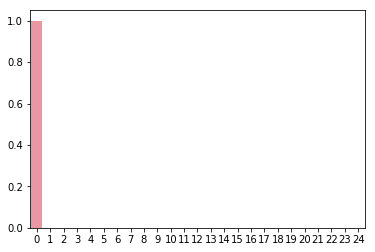

In [194]:
sns.barplot(list(range(len(pca.components_))), pca.explained_variance_ratio_)

In [202]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

loading_scores = [eig_vectors[i] * np.sqrt(eig_values[i]) for i in range(len(pca.components_))]
for score in loading_scores:
    display(pd.Series(score, index=X.columns).sort_values(ascending=False))

duration_ms                 301823.882778
no_segments                    898.969507
no_unique_pitches               95.496126
no_unique_timbres               42.116657
seg_duration_range              16.076368
sec_duration_range              16.076368
no_sections                     12.340037
sec_tempo_range                  8.011455
sec_loudness_range               7.083860
sec_key_range                    1.300521
sec_time_signature_range         0.808913
loudness                         0.309948
sec_mode_range                   0.128857
mean_pitch                       0.030941
time_signature                   0.022994
instrumentalness                 0.019996
speechiness                     -0.000812
acousticness                    -0.002503
energy                          -0.010905
liveness                        -0.018994
mode                            -0.027267
danceability                    -0.052376
valence                         -0.087926
key                             -0

no_segments                 214.234664
no_unique_pitches            44.485707
no_unique_timbres            11.904579
tempo                         4.091775
sec_tempo_range               2.246297
loudness                      1.691175
no_sections                   0.477680
sec_key_range                 0.264922
seg_duration_range            0.238958
sec_duration_range            0.238958
key                           0.111294
sec_mode_range                0.036103
valence                       0.035843
time_signature                0.034727
energy                        0.034337
danceability                  0.027834
sec_time_signature_range      0.015771
mean_pitch                    0.014361
acousticness                  0.006197
liveness                      0.004083
speechiness                   0.001068
mode                         -0.005645
instrumentalness             -0.026586
sec_loudness_range           -0.455563
duration_ms                  -0.653871
dtype: float64

no_segments                 21.587505
tempo                        0.583855
key                          0.085625
valence                      0.056619
danceability                 0.026620
mode                         0.020799
liveness                     0.008565
acousticness                 0.001731
speechiness                  0.000177
energy                      -0.010581
time_signature              -0.014065
instrumentalness            -0.028942
duration_ms                 -0.029718
mean_pitch                  -0.032601
sec_mode_range              -0.123760
no_sections                 -0.123963
sec_time_signature_range    -0.371437
loudness                    -0.561501
sec_key_range               -0.958087
sec_loudness_range          -3.690591
sec_tempo_range             -4.649576
seg_duration_range          -4.873759
sec_duration_range          -4.873759
no_unique_timbres          -18.397849
no_unique_pitches          -98.814390
dtype: float64

no_unique_timbres           42.301500
sec_duration_range           1.231638
seg_duration_range           1.231638
sec_tempo_range              0.903856
sec_loudness_range           0.433573
sec_key_range                0.301150
sec_time_signature_range     0.246063
no_sections                  0.146372
sec_mode_range               0.042277
acousticness                 0.032434
key                          0.026972
speechiness                  0.002661
instrumentalness            -0.001300
duration_ms                 -0.001811
mode                        -0.003426
mean_pitch                  -0.003579
danceability                -0.004947
time_signature              -0.005618
liveness                    -0.018016
energy                      -0.036739
valence                     -0.052796
no_segments                 -0.576084
loudness                    -1.478923
tempo                       -3.777604
no_unique_pitches           -8.200017
dtype: float64

sec_tempo_range             26.641492
seg_duration_range           6.479259
sec_duration_range           6.479259
sec_loudness_range           2.065633
no_segments                  0.400488
sec_time_signature_range     0.217691
sec_key_range                0.028791
key                          0.010207
sec_mode_range               0.002716
instrumentalness             0.000581
speechiness                  0.000427
mean_pitch                  -0.000496
duration_ms                 -0.001972
acousticness                -0.004451
liveness                    -0.005514
energy                      -0.005686
time_signature              -0.014441
mode                        -0.019081
valence                     -0.023542
danceability                -0.025019
no_sections                 -0.310756
loudness                    -0.430778
no_unique_pitches           -1.509702
no_unique_timbres           -2.390384
tempo                      -12.541335
dtype: float64

tempo                       27.038030
sec_tempo_range             12.813746
no_unique_timbres            1.948763
sec_loudness_range           0.942761
loudness                     0.282190
no_sections                  0.262186
sec_key_range                0.044481
valence                      0.016963
danceability                 0.011957
energy                       0.005959
mode                         0.005794
speechiness                  0.001732
duration_ms                  0.001670
mean_pitch                  -0.000554
sec_mode_range              -0.000912
acousticness                -0.002163
time_signature              -0.002936
liveness                    -0.005490
instrumentalness            -0.016236
seg_duration_range          -0.045195
sec_duration_range          -0.045195
sec_time_signature_range    -0.053189
key                         -0.062946
no_segments                 -0.560162
no_unique_pitches           -0.961336
dtype: float64

sec_duration_range          14.988742
seg_duration_range          14.988742
tempo                        2.937330
no_segments                  0.216520
loudness                     0.203669
time_signature               0.025224
energy                       0.007710
valence                      0.002303
speechiness                  0.000892
mode                         0.000660
danceability                 0.000350
mean_pitch                  -0.000599
liveness                    -0.001079
duration_ms                 -0.001577
acousticness                -0.002122
sec_mode_range              -0.010073
instrumentalness            -0.015471
sec_time_signature_range    -0.028465
sec_key_range               -0.116661
key                         -0.161462
sec_loudness_range          -0.414113
no_unique_timbres           -0.654595
no_unique_pitches           -0.992383
no_sections                 -1.307976
sec_tempo_range             -6.005486
dtype: float64

sec_loudness_range          9.021966
loudness                    0.313459
sec_key_range               0.296737
no_sections                 0.151208
no_segments                 0.084970
sec_time_signature_range    0.061484
instrumentalness            0.019603
sec_mode_range              0.014492
tempo                       0.013820
time_signature              0.006836
duration_ms                -0.000351
mean_pitch                 -0.000461
acousticness               -0.001098
speechiness                -0.001322
energy                     -0.006025
danceability               -0.007753
liveness                   -0.009001
mode                       -0.013616
key                        -0.022013
sec_duration_range         -0.023837
seg_duration_range         -0.023837
valence                    -0.024657
no_unique_timbres          -0.117363
no_unique_pitches          -0.266207
sec_tempo_range            -0.702329
dtype: float64

no_sections                 0.259409
sec_time_signature_range    0.213376
sec_key_range               0.184592
sec_loudness_range          0.172170
key                         0.107178
tempo                       0.101887
no_unique_pitches           0.064590
no_segments                 0.037970
sec_duration_range          0.024961
seg_duration_range          0.024961
mode                        0.023772
sec_mode_range              0.019560
acousticness                0.005066
duration_ms                -0.000119
speechiness                -0.000419
mean_pitch                 -0.000641
liveness                   -0.022028
time_signature             -0.033374
danceability               -0.038432
instrumentalness           -0.049069
valence                    -0.053275
energy                     -0.070212
sec_tempo_range            -0.077959
no_unique_timbres          -0.175014
loudness                   -5.489129
dtype: float64

key                         3.456143
sec_key_range               0.222707
loudness                    0.074890
seg_duration_range          0.017039
sec_duration_range          0.017039
tempo                       0.009108
danceability                0.003200
valence                     0.002694
energy                      0.001602
liveness                    0.000381
mean_pitch                  0.000061
duration_ms                 0.000007
speechiness                -0.000642
no_unique_pitches          -0.001191
no_unique_timbres          -0.001454
acousticness               -0.001664
sec_loudness_range         -0.001722
no_sections                -0.002024
no_segments                -0.002498
sec_tempo_range            -0.004381
sec_mode_range             -0.004791
sec_time_signature_range   -0.006160
instrumentalness           -0.006661
time_signature             -0.014013
mode                       -0.034705
dtype: float64

sec_loudness_range          0.073752
key                         0.067066
sec_tempo_range             0.019253
no_unique_timbres           0.017917
no_unique_pitches           0.015539
valence                     0.013270
mode                        0.012619
tempo                       0.009425
time_signature              0.009283
danceability                0.006182
energy                      0.005441
liveness                    0.004143
no_segments                 0.002412
speechiness                 0.001411
duration_ms                 0.000078
mean_pitch                  0.000068
instrumentalness           -0.003935
acousticness               -0.005268
sec_mode_range             -0.051370
sec_duration_range         -0.084424
seg_duration_range         -0.084424
loudness                   -0.130875
sec_time_signature_range   -0.140343
sec_key_range              -1.003947
no_sections                -1.981211
dtype: float64

no_sections                 0.887507
key                         0.111988
sec_loudness_range          0.043618
seg_duration_range          0.032669
sec_duration_range          0.032669
mode                        0.032604
valence                     0.015722
no_unique_pitches           0.009678
no_unique_timbres           0.008482
time_signature              0.008453
danceability                0.004750
speechiness                 0.000232
mean_pitch                 -0.000015
duration_ms                -0.000031
acousticness               -0.000576
liveness                   -0.001567
energy                     -0.001838
no_segments                -0.002074
tempo                      -0.003877
sec_tempo_range            -0.007114
instrumentalness           -0.012866
loudness                   -0.015860
sec_mode_range             -0.075452
sec_time_signature_range   -0.081860
sec_key_range              -1.727979
dtype: float64

sec_time_signature_range    1.154575e+00
loudness                    4.186633e-02
sec_mode_range              1.297012e-02
key                         5.659300e-03
tempo                       5.390081e-03
liveness                    3.471812e-03
no_segments                 4.196548e-04
speechiness                 1.142555e-04
duration_ms                -2.706277e-07
mean_pitch                 -1.648896e-04
acousticness               -1.985411e-03
no_unique_pitches          -2.061239e-03
sec_duration_range         -3.144862e-03
seg_duration_range         -3.144862e-03
no_unique_timbres          -4.163693e-03
energy                     -5.093018e-03
sec_tempo_range            -5.279169e-03
mode                       -5.611054e-03
sec_loudness_range         -6.492731e-03
instrumentalness           -6.767343e-03
danceability               -3.122195e-02
valence                    -3.596883e-02
no_sections                -4.527206e-02
sec_key_range              -8.007010e-02
time_signature  

mode                        1.512077e-02
sec_key_range               2.988253e-03
no_sections                 2.124118e-03
valence                     1.299648e-03
sec_loudness_range          1.023584e-03
loudness                    7.893863e-04
sec_duration_range          6.063801e-04
seg_duration_range          6.063801e-04
no_unique_timbres           4.332396e-04
no_unique_pitches           2.517706e-04
no_segments                 3.669118e-05
duration_ms                -1.403114e-07
sec_tempo_range            -5.379231e-05
tempo                      -3.272916e-04
mean_pitch                 -3.374208e-04
speechiness                -4.821018e-04
energy                     -1.679336e-03
liveness                   -1.764533e-03
danceability               -2.178305e-03
key                        -2.969790e-03
instrumentalness           -3.621434e-03
acousticness               -3.767465e-03
sec_mode_range             -1.632010e-02
sec_time_signature_range   -9.051285e-02
time_signature  

sec_mode_range              1.310135e-01
instrumentalness            5.009782e-03
liveness                    3.862485e-03
energy                      2.308012e-03
no_sections                 1.057358e-03
speechiness                 4.242590e-04
tempo                       2.245789e-04
mean_pitch                  1.643586e-04
no_segments                 1.732573e-05
duration_ms                -6.837525e-08
sec_duration_range         -1.680885e-05
seg_duration_range         -1.680885e-05
no_unique_pitches          -5.308419e-05
no_unique_timbres          -9.457624e-05
sec_tempo_range            -1.728605e-04
sec_loudness_range         -3.900348e-04
loudness                   -2.080417e-03
key                        -3.415018e-03
danceability               -5.004386e-03
acousticness               -5.652807e-03
sec_time_signature_range   -6.616332e-03
valence                    -1.119944e-02
time_signature             -1.242717e-02
sec_key_range              -1.371688e-02
mode            

valence                     1.771776e-02
sec_mode_range              1.224722e-02
danceability                1.028720e-02
loudness                    2.746626e-03
speechiness                 2.312939e-03
sec_key_range               1.802590e-03
time_signature              1.728534e-03
sec_loudness_range          5.899754e-04
no_unique_timbres           8.581717e-05
no_unique_pitches           2.505536e-05
duration_ms                 2.257791e-07
sec_tempo_range            -6.834643e-06
no_segments                -7.050095e-05
seg_duration_range         -1.682745e-04
sec_duration_range         -1.682745e-04
tempo                      -2.650539e-04
mode                       -4.750813e-04
no_sections                -4.989338e-04
mean_pitch                 -5.987936e-04
key                        -8.086865e-04
sec_time_signature_range   -1.020206e-03
liveness                   -1.438820e-03
energy                     -7.128442e-03
acousticness               -2.085784e-02
instrumentalness

valence                     1.212103e-02
sec_key_range               1.148493e-02
sec_time_signature_range    4.810056e-03
time_signature              4.648279e-03
danceability                4.100294e-03
speechiness                 1.051557e-03
no_sections                 9.805757e-04
energy                      3.017064e-04
no_unique_timbres           1.944343e-04
no_unique_pitches           1.936821e-04
duration_ms                -1.804110e-08
sec_loudness_range         -7.373613e-06
tempo                      -1.042695e-05
sec_duration_range         -1.521100e-05
seg_duration_range         -1.521100e-05
no_segments                -1.644328e-05
sec_tempo_range            -3.885118e-05
mean_pitch                 -5.259652e-04
loudness                   -9.095695e-04
acousticness               -1.866510e-03
key                        -1.999411e-03
liveness                   -5.136387e-03
instrumentalness           -9.913171e-03
mode                       -8.665861e-02
sec_mode_range  

valence                     1.497548e-01
danceability                7.714756e-02
energy                      2.957505e-02
liveness                    1.376217e-02
instrumentalness            1.064547e-02
sec_mode_range              7.521739e-03
sec_time_signature_range    6.792318e-03
speechiness                 2.827197e-03
sec_key_range               9.495671e-04
mean_pitch                  9.410317e-04
sec_loudness_range          4.672944e-04
no_sections                 3.276926e-04
no_unique_timbres           8.617478e-05
seg_duration_range          5.102836e-05
sec_duration_range          5.102836e-05
no_unique_pitches           2.188044e-05
sec_tempo_range             1.236106e-05
duration_ms                 7.653272e-08
no_segments                -3.104688e-05
tempo                      -1.226392e-04
key                        -2.019048e-04
time_signature             -1.234048e-03
mode                       -2.018314e-03
loudness                   -2.185799e-03
acousticness    

liveness                    1.276990e-01
energy                      1.786863e-02
speechiness                 4.773878e-03
mode                        1.018933e-03
mean_pitch                  6.779940e-04
no_sections                 3.893444e-04
sec_key_range               1.451858e-04
sec_loudness_range          1.215091e-04
no_unique_timbres           5.398404e-05
seg_duration_range          2.041626e-05
sec_duration_range          2.041626e-05
tempo                       2.012509e-05
sec_tempo_range             5.213402e-06
no_segments                 1.058299e-06
duration_ms                -2.170956e-08
no_unique_pitches          -8.174872e-06
key                        -8.230923e-06
time_signature             -3.507756e-05
instrumentalness           -4.875554e-04
loudness                   -5.980599e-04
sec_time_signature_range   -8.641600e-04
sec_mode_range             -2.967387e-03
danceability               -8.593363e-03
valence                    -1.173460e-02
acousticness    

energy                      2.457308e-02
instrumentalness            4.814727e-03
speechiness                 2.900365e-03
mode                        1.335724e-03
valence                     1.270770e-03
time_signature              5.778729e-04
sec_mode_range              2.268087e-04
no_sections                 2.036035e-04
mean_pitch                  1.487494e-04
sec_key_range               8.792162e-05
no_unique_timbres           6.835585e-05
no_segments                 3.340794e-06
duration_ms                -2.345296e-08
tempo                      -3.028632e-06
sec_duration_range         -3.758330e-06
seg_duration_range         -3.758330e-06
key                        -1.186944e-05
sec_tempo_range            -1.902717e-05
no_unique_pitches          -1.954482e-05
sec_loudness_range         -3.141277e-05
loudness                   -2.506854e-04
sec_time_signature_range   -2.611365e-04
danceability               -1.671151e-02
liveness                   -2.035760e-02
acousticness    

danceability                7.153195e-02
energy                      1.434397e-02
speechiness                 5.696845e-03
sec_time_signature_range    7.057107e-04
mean_pitch                  5.972951e-04
instrumentalness            3.881096e-04
mode                        2.123479e-04
no_sections                 7.180086e-05
sec_tempo_range             1.493952e-05
seg_duration_range          5.742777e-06
sec_duration_range          5.742777e-06
no_unique_pitches           1.686836e-06
duration_ms                 3.458103e-09
no_segments                -6.531467e-07
tempo                      -1.080051e-05
key                        -2.759989e-05
sec_loudness_range         -3.156270e-05
no_unique_timbres          -3.664280e-05
sec_key_range              -1.477457e-04
loudness                   -2.714208e-04
time_signature             -3.698794e-04
sec_mode_range             -5.890846e-04
liveness                   -2.754394e-03
acousticness               -9.272985e-03
valence         

energy                      6.229851e-02
acousticness                2.104971e-02
speechiness                 3.564658e-03
mean_pitch                  1.512961e-03
mode                        1.543446e-04
no_sections                 1.172144e-04
sec_loudness_range          4.420773e-05
no_unique_timbres           6.654768e-06
key                         6.122205e-06
duration_ms                 4.009360e-09
tempo                      -1.684931e-06
no_segments                -2.220996e-06
sec_tempo_range            -7.130240e-06
seg_duration_range         -7.910544e-06
sec_duration_range         -7.910544e-06
no_unique_pitches          -9.953703e-06
sec_key_range              -2.797103e-05
sec_time_signature_range   -1.550529e-04
time_signature             -1.804424e-04
sec_mode_range             -2.337952e-04
loudness                   -5.939729e-04
instrumentalness           -3.320682e-03
valence                    -4.116571e-03
liveness                   -6.341153e-03
danceability    

speechiness                 2.322171e-02
acousticness                6.197924e-04
valence                     5.538653e-04
mean_pitch                  4.096266e-04
instrumentalness            1.648249e-04
sec_mode_range              8.032378e-05
loudness                    2.493458e-05
mode                        2.493230e-05
sec_key_range               6.090243e-06
key                         5.776315e-06
no_sections                 3.838144e-06
sec_loudness_range          8.071445e-07
no_unique_pitches           2.885324e-07
no_segments                 7.130369e-08
duration_ms                -2.592191e-10
sec_duration_range         -2.669411e-07
seg_duration_range         -2.669411e-07
tempo                      -5.785456e-07
sec_tempo_range            -1.087915e-06
no_unique_timbres          -2.216955e-06
time_signature             -9.053262e-06
sec_time_signature_range   -2.203666e-05
liveness                   -5.323579e-04
danceability               -1.125601e-03
energy          

mean_pitch                  5.800336e-03
valence                     1.185840e-06
loudness                    1.148197e-06
sec_key_range               3.871027e-07
sec_loudness_range          9.423490e-08
no_unique_timbres           7.829334e-08
tempo                       7.444898e-08
sec_duration_range          5.408021e-08
seg_duration_range          5.408021e-08
no_segments                 2.027739e-08
duration_ms                -6.132529e-11
sec_tempo_range            -2.242128e-08
key                        -1.616178e-07
no_sections                -2.527770e-07
sec_time_signature_range   -3.744099e-07
mode                       -1.326301e-06
no_unique_pitches          -1.916375e-06
time_signature             -1.967539e-06
instrumentalness           -7.836334e-06
sec_mode_range             -1.014174e-05
liveness                   -1.386852e-05
danceability               -1.625022e-05
acousticness               -2.461501e-05
speechiness                -1.127804e-04
energy          

sec_duration_range          3.433348e-15
danceability                8.678086e-29
energy                      4.015899e-29
acousticness                3.502664e-29
liveness                    1.595435e-29
valence                     4.661480e-30
mode                        2.486861e-30
no_sections                 2.475392e-30
sec_mode_range              2.298819e-30
time_signature              8.932710e-31
sec_tempo_range             3.999945e-31
loudness                    1.626070e-31
sec_time_signature_range    1.525107e-31
no_unique_pitches           1.666482e-32
duration_ms                 5.496900e-35
no_unique_timbres          -1.535098e-32
no_segments                -2.467096e-32
tempo                      -7.110819e-32
sec_loudness_range         -4.613384e-31
key                        -6.695363e-31
sec_key_range              -7.271947e-31
instrumentalness           -6.497127e-30
mean_pitch                 -6.356120e-29
speechiness                -1.299368e-28
seg_duration_ran

99.999% of variance is explained by the first component! When we look at the loading score, it looks like that direction is dominated by the duration, then to a (much) lesser extent by the number of segments, unique pitches, and unique timbres. This mostly just means that a lot of the data 'moves' in the same direction -- it's measured in ways that are highly interrelated, which makes sense for music. For example, sadder songs (closer to 0) tend to have slower tempos (closer to 0), right? 

### Regularization

In [211]:
from sklearn.feature_selection import SelectFromModel

# need to use scaled data for SVMs
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

reg = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
reg.fit(X_train, y_train)
reg.get_support()

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True])

In [217]:
selected = X_train.columns[(reg.get_support() == 1).ravel().tolist()]
list(selected)

['valence',
 'acousticness',
 'key',
 'loudness',
 'mean_pitch',
 'mode',
 'no_sections']

In [222]:
df_selected = X[['valence',
                 'acousticness',
                 'key',
                 'loudness',
                 'mean_pitch',
                 'mode',
                 'no_sections']]

### Models based on regularization
Now that we have the features that are theoretically the most important -- let's look at them in the models that have been most successful: Random Forest and SVM. The tuned parameters from before cannot be used anymore, so if this goes well, we'll have to parameter tune again. 

In [228]:
X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
evaluation(y_test, y_pred)

classification report: 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       215
           1       0.81      0.77      0.79       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.7973421926910298
Accuracy score: 0.7976470588235294


/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Not bad -- now we need to tune this to see how much better it can get.

In [229]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'max_depth': [1, 5, 10],
            'max_features': [1, 2, 4, 8],
            'min_samples_leaf': [2, 10, 100, 500, 1000],
            'min_samples_split': [2, 10, 100, 500, 1000],
            'n_estimators': [100, 500, 1000]
             }


# Create grid search object
clf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 24.3min finished


classification report: 

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       215
           1       0.82      0.81      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8187153931339978
Accuracy score: 0.8188235294117647
None
{'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [227]:
X_train, X_test, y_train, y_test = train_test_split(df_selected, y)

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluation(y_test, y_pred)

classification report: 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       258
           1       0.81      0.77      0.79       273

   micro avg       0.79      0.79      0.79       531
   macro avg       0.79      0.79      0.79       531
weighted avg       0.79      0.79      0.79       531

ROC AUC: 0.7914856461368089
Accuracy score: 0.7909604519774012


/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [230]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'C':[.1, 1,10,100],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf'] 
             }


# Create grid search object
clf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter C for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.